In [1]:
import os
import pandas as pd
import numpy as np
from ictdeploy import Simulator as Sim

In [2]:
sim = Sim()

In [3]:
me_bat = sim.edit.add_meta(
    name="META_BAT",
    set_attrs=["P_heating"],
    get_attrs=["T_int"]
)

me_ctrl = sim.edit.add_meta(
    name="META_CRTL",
    set_attrs=["T_int"],
    get_attrs=["Heating_ON_OFF"]
)

me_heat = sim.edit.add_meta(
    name="META_HEAT",
    set_attrs=["Heating_ON_OFF"],
    get_attrs=["P_heating"]
)

In [4]:
mo_bat = sim.edit.add_model(
        name="MODEL_BAT",
        meta=me_bat,
        image="integrcity/ict-simple",
        wrapper=os.path.join("wrappers", "building_wrapper.py"),
        command=None,
        files=[os.path.join("models", "building_model.py")]
)

mo_ctrl = sim.edit.add_model(
        name="MODEL_CRTL",
        meta=me_ctrl,
        image="integrcity/ict-simple",
        wrapper=os.path.join("wrappers", "control_wrapper.py"),
        command=None,
        files=[os.path.join("models", "control_model.py")]
)

mo_heat = sim.edit.add_model(
        name="MODEL_HEAT",
        meta=me_heat,
        image="integrcity/ict-simple",
        wrapper=os.path.join("wrappers", "heating_wrapper.py"),
        command=None,
        files=[os.path.join("models", "heating_model.py")]
)

In [5]:
N = 20

data = pd.DataFrame()
data["U"] = np.random.randint(low=150, high=250, size=N)
data["C"] = np.random.randint(low=40E6, high=60E6, size=N)
data["T_init"] = np.random.normal(loc=20.0, scale=1.0, size=N)
data["T_set"] = np.random.choice([18, 19, 20, 21, 22], size=N)
data["deltaT"] = np.random.choice([0.5, 1.0, 1.5, 2.0], size=N)
data["P_nom"] = np.random.choice([15E3, 20E3, 25E3], size=N)

data.head()

,U,C,T_init,T_set,deltaT,P_nom
0,247,45187590,19.711685,22,1.5,20000.0
1,202,42565721,18.280391,21,1.0,20000.0
2,223,50218995,19.438510,20,2.0,25000.0
3,245,40534009,20.153998,22,1.5,20000.0
4,185,46605979,21.248727,19,1.5,20000.0


In [6]:
n_bat = []
n_ctrl = []
n_heat = []

for i, row in data.iterrows():
    
    n_bat.append(sim.edit.add_node(
        name="BAT_{}".format(i),
        model=mo_bat,
        init_values={"U": row[0],"C": row[1], "T_init": row[2]},
        is_first=True
    ))

    n_ctrl.append(sim.edit.add_node(
        name="CRTL_{}".format(i),
        model=mo_ctrl,
        init_values={"T_set": row[3],"deltaT": row[4]},
        is_first=False
    ))

    n_heat.append(sim.edit.add_node(
        name="HEAT_{}".format(i),
        model=mo_heat,
        init_values={"P_nom": row[5]},
        is_first=False
    ))
    
    sim.edit.add_link(
        get_node="BAT_{}".format(i), 
        get_attr="T_int", 
        set_node="CRTL_{}".format(i), 
        set_attr="T_int")
    sim.edit.add_link(
        get_node="CRTL_{}".format(i), 
        get_attr="Heating_ON_OFF", 
        set_node="HEAT_{}".format(i), 
        set_attr="Heating_ON_OFF")
    sim.edit.add_link(
        get_node="HEAT_{}".format(i), 
        get_attr="P_heating", 
        set_node="BAT_{}".format(i), 
        set_attr="P_heating")

sim.edit.nodes

,meta,model,to_set,to_get,image,wrapper,files,command,init_values,is_first
BAT_0,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 247.0, 'C': 45187590.0, 'T_init': 19.711...",True
BAT_1,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 202.0, 'C': 42565721.0, 'T_init': 18.280...",True
BAT_10,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 153.0, 'C': 58118163.0, 'T_init': 19.656...",True
BAT_11,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 229.0, 'C': 48854019.0, 'T_init': 20.967...",True
BAT_12,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 190.0, 'C': 54585295.0, 'T_init': 19.667...",True
BAT_13,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 150.0, 'C': 53523974.0, 'T_init': 20.934...",True
BAT_14,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 166.0, 'C': 52587378.0, 'T_init': 19.698...",True
BAT_15,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 175.0, 'C': 59457399.0, 'T_init': 18.893...",True
BAT_16,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 205.0, 'C': 43631886.0, 'T_init': 19.730...",True
BAT_17,META_BAT,MODEL_BAT,[P_heating],[T_int],integrcity/ict-simple,wrappers/building_wrapper.py,[models/building_model.py],None,"{'U': 178.0, 'C': 52499582.0, 'T_init': 20.306...",True


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


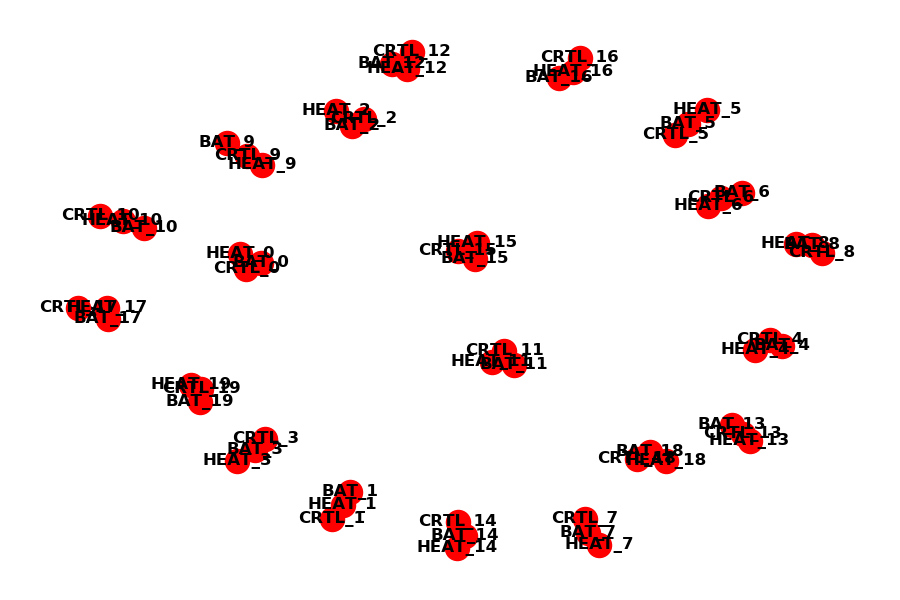

In [8]:
%matplotlib notebook
plt.figure(figsize=(9, 6))
g = sim.edit.graph
nx.draw(g, with_labels=True, font_weight='bold')

In [9]:
grp0 = sim.create_group(*n_bat)
grp1 = sim.create_group(*n_ctrl)
grp2 = sim.create_group(*n_heat)

sim.create_sequence(grp0, grp1, grp2)
sim.create_steps([60]*60*24*7)

In [10]:
logs = sim.run_simulation(server="server.py")

In [11]:
for l in sim.get_logs(logs["orc"]):
    if "INFO" in l:
        print(l)

INFO - 2018-05-29 07:31:45,507 - Connected to 172.17.01/obnl_vhost
INFO - 2018-05-29 07:31:45,518 - scheduler initialised.
INFO - 2018-05-29 07:31:47,311 - Simulator BAT_0 is connected.
INFO - 2018-05-29 07:31:47,335 - Simulator BAT_1 is connected.
INFO - 2018-05-29 07:31:47,783 - Simulator BAT_10 is connected.
INFO - 2018-05-29 07:31:48,300 - Simulator BAT_11 is connected.
INFO - 2018-05-29 07:31:48,698 - Simulator BAT_12 is connected.
INFO - 2018-05-29 07:31:49,264 - Simulator BAT_13 is connected.
INFO - 2018-05-29 07:31:49,715 - Simulator BAT_14 is connected.
INFO - 2018-05-29 07:31:50,206 - Simulator BAT_15 is connected.
INFO - 2018-05-29 07:31:50,693 - Simulator BAT_16 is connected.
INFO - 2018-05-29 07:31:51,209 - Simulator BAT_17 is connected.
INFO - 2018-05-29 07:31:51,743 - Simulator BAT_18 is connected.
INFO - 2018-05-29 07:31:52,262 - Simulator BAT_19 is connected.
INFO - 2018-05-29 07:31:52,852 - Simulator BAT_2 is connected.
INFO - 2018-05-29 07:31:53,307 - Simulator BAT_3

In [15]:
sim.results.connect_to_results_db()
sim.results.list_of_available_results

,IN/OUT,Node,Attribute
0,IN,HEAT_18,Heating_ON_OFF
1,OUT,BAT_8,T_int
2,OUT,BAT_0,T_int
3,OUT,BAT_6,T_int
4,IN,CRTL_12,T_int
5,IN,BAT_13,P_heating
6,IN,CRTL_3,T_int
7,IN,CRTL_0,T_int
8,OUT,HEAT_10,P_heating
9,OUT,BAT_17,T_int


In [19]:
results = sim.results.get_results_by_pattern("*OUT*T_int*")
results.keys()

dict_keys(['OUT||BAT_0||T_int', 'OUT||BAT_10||T_int', 'OUT||BAT_11||T_int', 'OUT||BAT_12||T_int', 'OUT||BAT_13||T_int', 'OUT||BAT_14||T_int', 'OUT||BAT_15||T_int', 'OUT||BAT_16||T_int', 'OUT||BAT_17||T_int', 'OUT||BAT_18||T_int', 'OUT||BAT_19||T_int', 'OUT||BAT_1||T_int', 'OUT||BAT_2||T_int', 'OUT||BAT_3||T_int', 'OUT||BAT_4||T_int', 'OUT||BAT_5||T_int', 'OUT||BAT_6||T_int', 'OUT||BAT_7||T_int', 'OUT||BAT_8||T_int', 'OUT||BAT_9||T_int'])

<IPython.core.display.Javascript object>


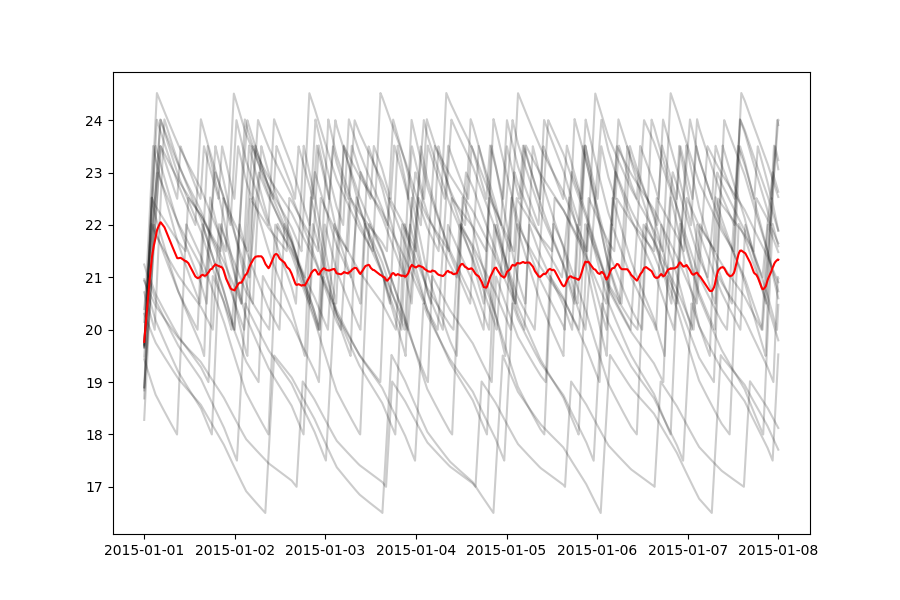

In [20]:
plt.figure(figsize=(9, 6))

res_t_int = pd.DataFrame(results)

for k, item in results.items():
    label = k.split("||")[1]
    plt.plot(item, "-", label=label, alpha=0.2, color="black")

plt.plot(res_t_int.mean(axis=1), "-", color="red")